In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

%matplotlib inline

In [2]:
data = pd.read_csv('bike_data.csv')
data = data.drop(['dteday'], axis=1)
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
normalized_df=(data-data.mean())/data.std()
train, test = train_test_split(normalized_df, test_size=0.3)
normalized_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,-1.728500,-1.347291,-1.000684,-1.599066,-0.171863,1.497783,-1.470218,1.109667,-0.826097,-0.679481,1.249316,-0.387626,-0.753218,-1.924153,-1.816709
1,-1.723764,-1.347291,-1.000684,-1.599066,-0.171863,-1.495054,-1.470218,1.109667,-0.720601,-0.740146,0.478785,0.749089,-1.044499,-1.913899,-1.911691
2,-1.719028,-1.347291,-1.000684,-1.599066,-0.171863,-0.996248,0.679241,-0.725551,-1.633538,-1.748570,-1.338358,0.746121,-1.060519,-1.555624,-1.628810
3,-1.714293,-1.347291,-1.000684,-1.599066,-0.171863,-0.497441,0.679241,-0.725551,-1.613675,-1.609168,-0.263001,-0.389562,-1.077996,-1.411417,-1.518858
4,-1.709557,-1.347291,-1.000684,-1.599066,-0.171863,0.001365,0.679241,-0.725551,-1.466410,-1.503941,-1.340576,-0.046275,-1.115863,-1.370398,-1.499242


In [1]:
m, n = train.shape
error_train = np.zeros(n)

nx_train = train.iloc[:,:-1].values
ny_train = train.iloc[:,-1].values
# ---- 
nx_test = test.iloc[:,:-1].values
ny_test = test.iloc[:,-1].values


ny_train = ny_train.reshape(-1,1)
ny_test = ny_test.reshape(-1,1)
nx_train = np.append(np.ones(shape=(nx_train.shape[0],1)),nx_train,axis = 1)
nx_test = np.append(np.ones(shape=(nx_test.shape[0],1)),nx_test,axis = 1)

NameError: name 'train' is not defined

In [ ]:
def calculate_hypothesis():
    pass

In [13]:
train_error = np.zeros(nx_test.shape[0])
test_error = np.zeros(nx_test.shape[0])

theta = np.dot(np.linalg.pinv(np.dot(np.transpose(nx_train), nx_train)), np.dot(np.transpose(nx_train), ny_train))
theta_ = np.dot(np.linalg.pinv(np.dot(np.transpose(nx_test), nx_test)), np.dot(np.transpose(nx_test), ny_test))

for i in range(1, nx_test.shape[0]):
    hyph_train = np.dot(nx_train[0:i,:], theta)
    hyph_test = np.dot(nx_test[0:i,:], theta)
    
    train_error[i] = mean_squared_error(hyph_train, ny_train[0:i,])
    test_error[i] = mean_squared_error(hyph_test, ny_test[0:i,])    

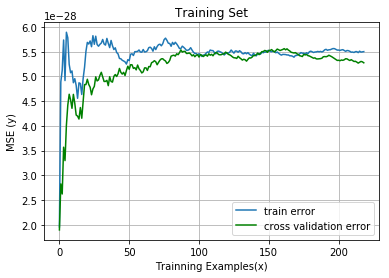

In [14]:
plt.plot(np.arange(test_error.shape[0]-1),train_error[1:], label = 'train error')
plt.plot(np.arange(test_error.shape[0]-1),test_error[1:], label = 'cross validation error', color='green')
plt.title('Training Set')
plt.xlabel('Trainning Examples(x)')
plt.ylabel('MSE (y)')
plt.grid()
plt.legend()
plt.show()